# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Example 1 - A simple cost function

#### $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
  return x**2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=100)


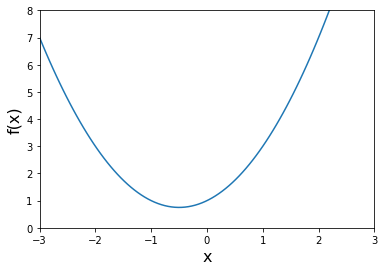

In [4]:
# Plot
plt.xlim([-3, 3])
plt.ylim(0,8)
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

Challenge: Create a python function for the derivative of f(x) called df(x)


In [5]:
def df(x):
  return 2*x + 1

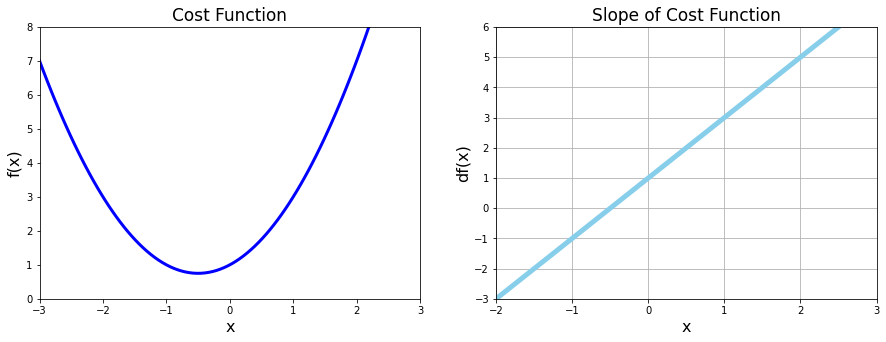

In [6]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

#1 Chart: Cost Function
plt.subplot(1,2,1)

plt.title('Cost Function', fontsize=17)
plt.xlim([-3, 3])
plt.ylim(0,8)
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative

plt.subplot(1,2,2)
plt.title('Slope of Cost Function', fontsize=17)
plt.xlim([-2, 3])
plt.ylim(-3,6)
plt.xlabel('x',fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Python Loops & Gradient Descent

In [7]:
# Python For Loop
for n in range(5): 
  print('Hello World', n)
print('End of Loop')

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
End of Loop


In [8]:
# Python While Loop
x = 0
while x < 7:
  print('Counting...', x)
  x = x+1
print('Ready or not, here I come')

Counting... 0
Counting... 1
Counting... 2
Counting... 3
Counting... 4
Counting... 5
Counting... 6
Ready or not, here I come


In [9]:
# Gradient Descent
new_x = -3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range (500):
  previous_x = new_x
  gradient = df(previous_x)
  new_x = previous_x - step_multiplier * gradient

  step_size = abs(new_x - previous_x)
  #print(step_size)

  x_list.append(new_x)
  slope_list.append(df(new_x))


  if step_size < precision:
    print('Loop ran this many times:', n)
    break

print('Local minimum occurs at:', new_x)
print('Slope of df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))


Loop ran this many times: 49
Local minimum occurs at: -0.5000356811923176
Slope of df(x) value at this point is: -7.136238463512079e-05
f(x) value or cost at this point is: 0.7500000012731475


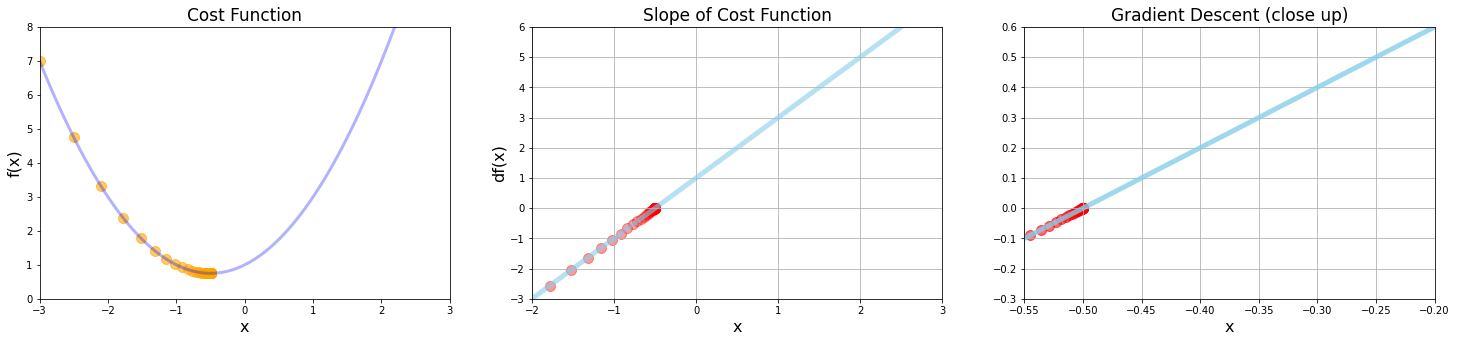

In [10]:
# Superimpose the graient descent calculations on the plot

plt.figure(figsize=[25,5])

#1 Chart: Cost Function
plt.subplot(1,3,1)

plt.title('Cost Function', fontsize=17)
plt.xlim([-3, 3])
plt.ylim(0,8)
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.3)

# Scatter Plot of looped numbers

values = np.array(x_list)
plt.scatter(x_list,f(values), color='orange', s=100, alpha=0.6)

# 2 Chart: Derivative

plt.subplot(1,3,2)
plt.title('Slope of Cost Function', fontsize=17)
plt.xlim([-2, 3])
plt.ylim(-3,6)
plt.xlabel('x',fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)

#scatter plot of slope
plt.scatter(x_list,slope_list, color='red', s=100, alpha=0.4)



# 3 Chart: Derivative (close up)

plt.subplot(1,3,3)
plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlim([-0.55, -0.2])
plt.ylim(-0.3,0.6)
plt.xlabel('x',fontsize=16)

plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.8)

plt.scatter(x_list,slope_list, color='red', s=100, alpha=0.6)

plt.show()

# Example 2 = Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [11]:
# Make some data
x_2 = np.linspace(-2,2,1000)

#  the g(x) function and dg(x) function in Python

def g(x):
  return x**4 - 4*x**2 + 5
#derivative function
def dg(x):
  return 4*x**3 - 8*x


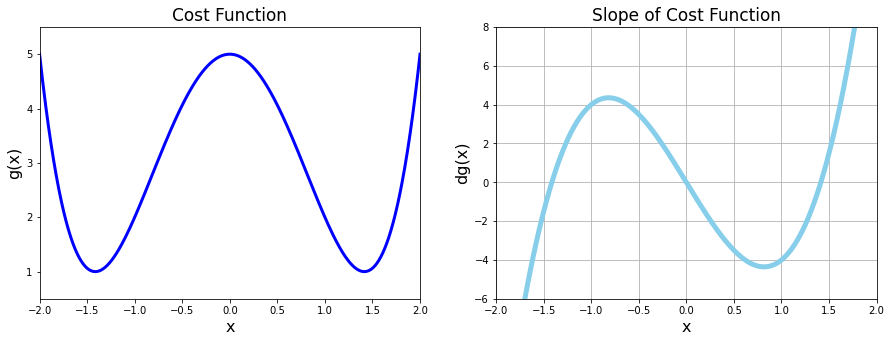

In [12]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

#1 Chart: Cost Function
plt.subplot(1,2,1)

plt.title('Cost Function', fontsize=17)
plt.xlim([-2, 2])
plt.ylim(0.5,5.5)
plt.xlabel('x',fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# 2 Chart: Derivative

plt.subplot(1,2,2)
plt.title('Slope of Cost Function', fontsize=17)
plt.xlim([-2, 2])
plt.ylim(-6,8)
plt.xlabel('x',fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent As a Python Function

In [13]:
# Gradient Descent

def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001):
  new_x = initial_guess

  x_list = [new_x]
  slope_list = [derivative_func(new_x)]

  for n in range (500):
    previous_x = new_x
    gradient = derivative_func(previous_x)
    new_x = previous_x - multiplier * gradient

    step_size = abs(new_x - previous_x)
    #print(step_size)

    x_list.append(new_x)
    slope_list.append(derivative_func(new_x))


    if step_size < precision:
      break


  return new_x, x_list, slope_list


In [14]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02,0.001)
print('Local min occurs at:', local_min)
print('Numer of steps:', len(list_x))


Local min occurs at: 1.4122375085019094
Numer of steps: 23


In [15]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5,
                                                  multiplier=0.02,precision=0.001)
print('Local min occurs at:', local_min)
print('Numer of steps:', len(list_x))


Local min occurs at: -1.4122375085019094
Numer of steps: 23


In [16]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=5)
print('Local min occurs at:', local_min)
print('Numer of steps:', len(list_x))

Local min occurs at: 1.4121118804732131
Numer of steps: 18


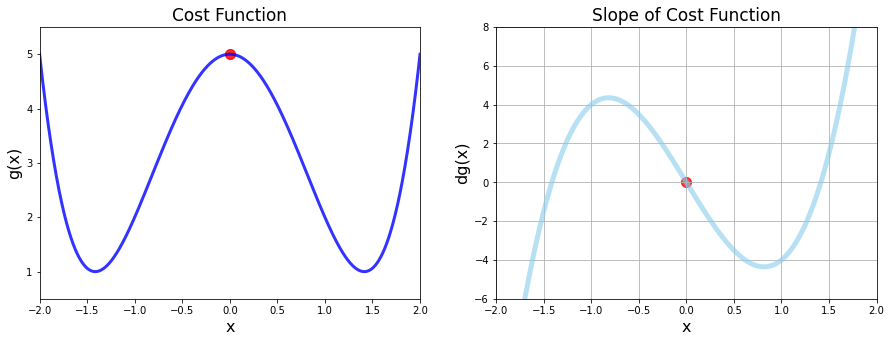

In [21]:
# Calling Gradient Descent Function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0)
# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

#1 Chart: Cost Function
plt.subplot(1,2,1)

plt.title('Cost Function', fontsize=17)
plt.xlim([-2, 2])
plt.ylim(0.5,5.5)
plt.xlabel('x',fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)
# 2 Chart: Derivative

plt.subplot(1,2,2)
plt.title('Slope of Cost Function', fontsize=17)
plt.xlim([-2, 2])
plt.ylim(-6,8)
plt.xlabel('x',fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)
plt.show()